In [1]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [12]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

bias = 10

X, y, coef = make_regression(n_samples=100, n_features=1, noise=5, random_state=42, coef=True, bias=bias)

y_mod = y**2 

In [13]:
out = lowess(y_mod, X.flatten())

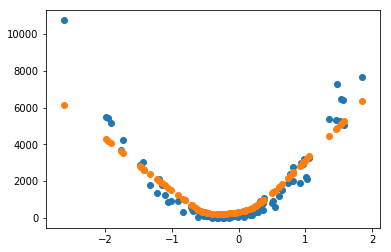

In [14]:
plt.scatter(X, y_mod)
plt.scatter(out[:, 0], out[:, 1])